In [24]:
import sys
sys.path.append('..')  # Add parent directory to path
from src.data_loader import ABCDDataLoader
from src.preprocess import ABCDPreprocessor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
import os

# Create processed data directory

In [26]:
os.makedirs('../data/processed', exist_ok=True)

# Initialize data loader

In [27]:
print("Initializing data loader...")
loader = ABCDDataLoader('../data')
loader.load_all()

Initializing data loader...


# Test the data loading

In [7]:
print("\nChecking loaded data:")
print(f"Number of splits: {len(loader.dialogs)}")
for split, dialogues in loader.dialogs.items():
    print(f"Number of dialogues in {split}: {len(dialogues)}")


Checking loaded data:
Number of splits: 3
Number of dialogues in train: 8034
Number of dialogues in dev: 1004
Number of dialogues in test: 1004


# Extract intent classification data

In [28]:
print("\nExtracting intent classification data...")
intent_data = loader.get_intent_classification_data()
print(f"Total number of examples: {len(intent_data)}")
print("\nSample of intent classification data:")
for text, intent in intent_data[:3]:
    print(f"\nText: {text[:100]}...")
    print(f"Intent: {intent}")


Extracting intent classification data...
Total number of examples: 10042

Sample of intent classification data:

Text: Hi! I need to return an item, can you help me with that?...
Intent: product_defect

Text: just wanted to check on the status of a refund...
Intent: product_defect

Text: HEY HO!...
Intent: storewide_query


# Extract action tracking data

In [9]:
print("\nExtracting action tracking data...")
action_data = loader.get_action_tracking_data()
print(f"Total number of examples: {len(action_data)}")
print("\nSample of action tracking data:")
for item in action_data[:3]:
    print("\nContext:")
    for turn in item['context']:
        print(f"{turn[0]}: {turn[1][:50]}...")
    print(f"Next action: {item['next_action']}")
    print(f"Flow: {item['flow']}")


Extracting action tracking data...
Total number of examples: 95129

Sample of action tracking data:

Context:
Next action: Hi!
Flow: product_defect

Context:
agent: Hi!...
Next action: How can I help you?
Flow: product_defect

Context:
agent: Hi!...
agent: How can I help you?...
customer: Hi! I need to return an item, can you help me with...
Next action: sure, may I have your name please?
Flow: product_defect


# Initialize preprocessor

In [10]:
print("\nInitializing preprocessor...")
preprocessor = ABCDPreprocessor()


Initializing preprocessor...


# Process intent data

In [11]:
print("\nProcessing intent classification data...")
processed_intent_data = preprocessor.prepare_intent_data(intent_data)
print(f"Number of processed examples: {len(processed_intent_data['texts'])}")
print("\nSample of processed intent data:")
for i in range(3):
    print(f"\nOriginal text: {intent_data[i][0][:100]}...")
    print(f"Processed text: {processed_intent_data['texts'][i][:100]}...")
    print(f"Label: {processed_intent_data['labels'][i]}")


Processing intent classification data...
Number of processed examples: 10042

Sample of processed intent data:

Original text: Hi! I need to return an item, can you help me with that?...
Processed text: hi! i need to return an item, can you help me with that?...
Label: product_defect

Original text: just wanted to check on the status of a refund...
Processed text: just wanted to check on the status of a refund...
Label: product_defect

Original text: HEY HO!...
Processed text: hey ho!...
Label: storewide_query


# Process action data

In [12]:
print("\nProcessing action tracking data...")
processed_action_data = preprocessor.prepare_action_data(action_data)
print(f"Number of processed examples: {len(processed_action_data['contexts'])}")
print("\nSample of processed action data:")
for i in range(3):
    print(f"\nProcessed context: {processed_action_data['contexts'][i][:100]}...")
    print(f"Action: {processed_action_data['actions'][i]}")
    print(f"Flow: {processed_action_data['flows'][i]}")


Processing action tracking data...
Number of processed examples: 95129

Sample of processed action data:

Processed context: ...
Action: Hi!
Flow: product_defect

Processed context: agent: hi!...
Action: How can I help you?
Flow: product_defect

Processed context: agent: hi! agent: how can i help you? customer: hi! i need to return an item, can you help me with t...
Action: sure, may I have your name please?
Flow: product_defect


# Analyze processed data

In [13]:
print("\nAnalyzing processed data...")


Analyzing processed data...


# Intent distribution

In [14]:
intent_counts = Counter(processed_intent_data['labels'])
print("\nIntent distribution:")
print("Top 10 most common intents:")
for intent, count in intent_counts.most_common(10):
    print(f"{intent}: {count}")


Intent distribution:
Top 10 most common intents:
storewide_query: 1094
purchase_dispute: 1076
product_defect: 1070
account_access: 1048
single_item_query: 1045
order_issue: 1040
troubleshoot_site: 1026
shipping_issue: 1020
subscription_inquiry: 910
manage_account: 713


# Visualize intent distribution

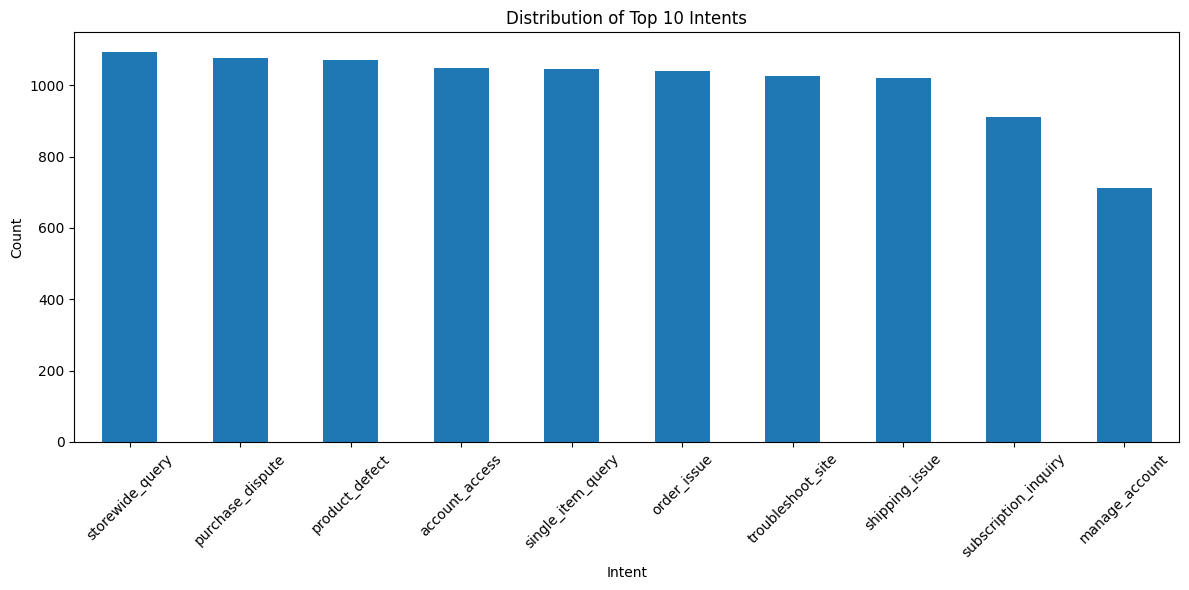

In [15]:
plt.figure(figsize=(12, 6))
pd.Series(processed_intent_data['labels']).value_counts().head(10).plot(kind='bar')
plt.title('Distribution of Top 10 Intents')
plt.xlabel('Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Text length distribution

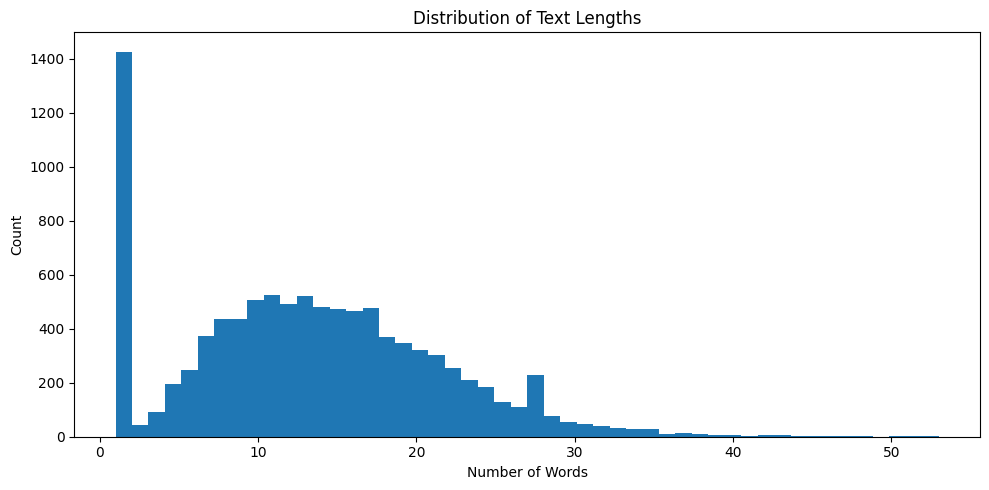

In [16]:
text_lengths = [len(text.split()) for text in processed_intent_data['texts']]
plt.figure(figsize=(10, 5))
plt.hist(text_lengths, bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Create DataFrames

In [18]:
intent_df = pd.DataFrame({
    'text': processed_intent_data['texts'],
    'intent': processed_intent_data['labels']
})

action_df = pd.DataFrame({
    'context': processed_action_data['contexts'],
    'action': processed_action_data['actions'],
    'flow': processed_action_data['flows']
})

# Split intent data

In [19]:
train_intent, temp_intent = train_test_split(intent_df, test_size=0.3, stratify=intent_df['intent'], random_state=42)
val_intent, test_intent = train_test_split(temp_intent, test_size=0.5, stratify=temp_intent['intent'], random_state=42)

print("\nIntent Classification Data Split Sizes:")
print(f"Training: {len(train_intent)}")
print(f"Validation: {len(val_intent)}")
print(f"Test: {len(test_intent)}")


Intent Classification Data Split Sizes:
Training: 7029
Validation: 1506
Test: 1507


# Split action data

In [20]:
train_action, temp_action = train_test_split(action_df, test_size=0.3, stratify=action_df['flow'], random_state=42)
val_action, test_action = train_test_split(temp_action, test_size=0.5, stratify=temp_action['flow'], random_state=42)

print("\nAction Tracking Data Split Sizes:")
print(f"Training: {len(train_action)}")
print(f"Validation: {len(val_action)}")
print(f"Test: {len(test_action)}")


Action Tracking Data Split Sizes:
Training: 66590
Validation: 14269
Test: 14270


# Save the processed data

In [22]:
print("\nSaving processed data...")
train_intent.to_csv('../data/processed/intent_train.csv', index=False)
val_intent.to_csv('../data/processed/intent_val.csv', index=False)
test_intent.to_csv('../data/processed/intent_test.csv', index=False)

train_action.to_csv('../data/processed/action_train.csv', index=False)
val_action.to_csv('../data/processed/action_val.csv', index=False)
test_action.to_csv('../data/processed/action_test.csv', index=False)

print("\nData processing complete!")


Saving processed data...

Data processing complete!
